In [1]:
import requests 
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Data from ME API

collection_name = 'degods'
responses = []
i = 0
while True:
    url = f"https://api-mainnet.magiceden.dev/v2/collections/{collection_name}/activities?offset={500 * i}&limit=500"
    response = requests.get(url)
    if response.text == '[]':
        break
    else :
        responses.append(response)
        i += 1
json_data = []
for i in range(len(responses)):
    json_data += responses[i].json()

KeyboardInterrupt: 

In [ ]:
# Load Json data to a dataframe and drop unnecessary columns  

data = pd.DataFrame(json_data)
columns_to_drop = ["signature", "source", "tokenMint" ,"collection" ,"slot", "buyer", "buyerReferral" ,"seller" , "sellerReferral"]
data.drop(columns_to_drop , axis=1, inplace=True)

In [4]:
# Convert Unix timestamp to date & add it to the dataframe

dates = []
for i in range(len(json_data)):
    dates.append(datetime.fromtimestamp(int(json_data[i]['blockTime'])).strftime('%Y-%m-%d'))

data['date'] = dates
# data = data.sort_values(by='blockTime', ascending=True).reset_index(drop=True)
# data.set_index('date', drop=True, append=False, inplace=False, verify_integrity=False)

# EDA

In [7]:
data.shape

(1000, 4)

In [49]:
data.type.describe() 

count       1000
unique         5
top       buyNow
freq         535
Name: type, dtype: object

In [23]:
data.type.unique()

array(['buyNow', 'list', 'delist', 'bid', 'cancelBid'], dtype=object)

In [24]:
data.type.value_counts()

buyNow       544
list         288
delist        91
bid           59
cancelBid     18
Name: type, dtype: int64

# Data Preparation

In [ ]:
# Preparing the num of sales data

buyNow_data = data.loc[data.type == 'buyNow']

start = datetime.strptime(buyNow_data.date.min(), '%Y-%m-%d')
end = datetime.strptime(buyNow_data.date.max(), '%Y-%m-%d') 


index = pd.date_range(start, periods=(end-start).days+1, freq='D')
columns = ['Sales']
sales_data = pd.DataFrame(index=index, columns=columns)

buyNow_data = buyNow_data.groupby('date').date.count()

for index, value in buyNow_data.items():
    sales_data.loc[index] = value
sales_data['Time'] = np.arange(len(sales_data.index))

NameError: name 'data' is not defined

In [28]:
sales_data[pd.isnull(sales_data.Sales)]

,Sales,Time
2022-02-08,NaN,3
2022-02-12,NaN,7
2022-02-13,NaN,8
2022-02-16,NaN,11
2022-02-22,NaN,17
2022-02-24,NaN,19
2022-02-25,NaN,20
2022-02-26,NaN,21
2022-02-27,NaN,22
2022-02-28,NaN,23


In [25]:
sales_data

,Sales,Time
2022-02-05,8,0
2022-02-06,8,1
2022-02-07,4,2
2022-02-08,NaN,3
2022-02-09,1,4
...,...,...
2022-05-01,1,85
2022-05-02,10,86
2022-05-03,10,87
2022-05-04,1,88


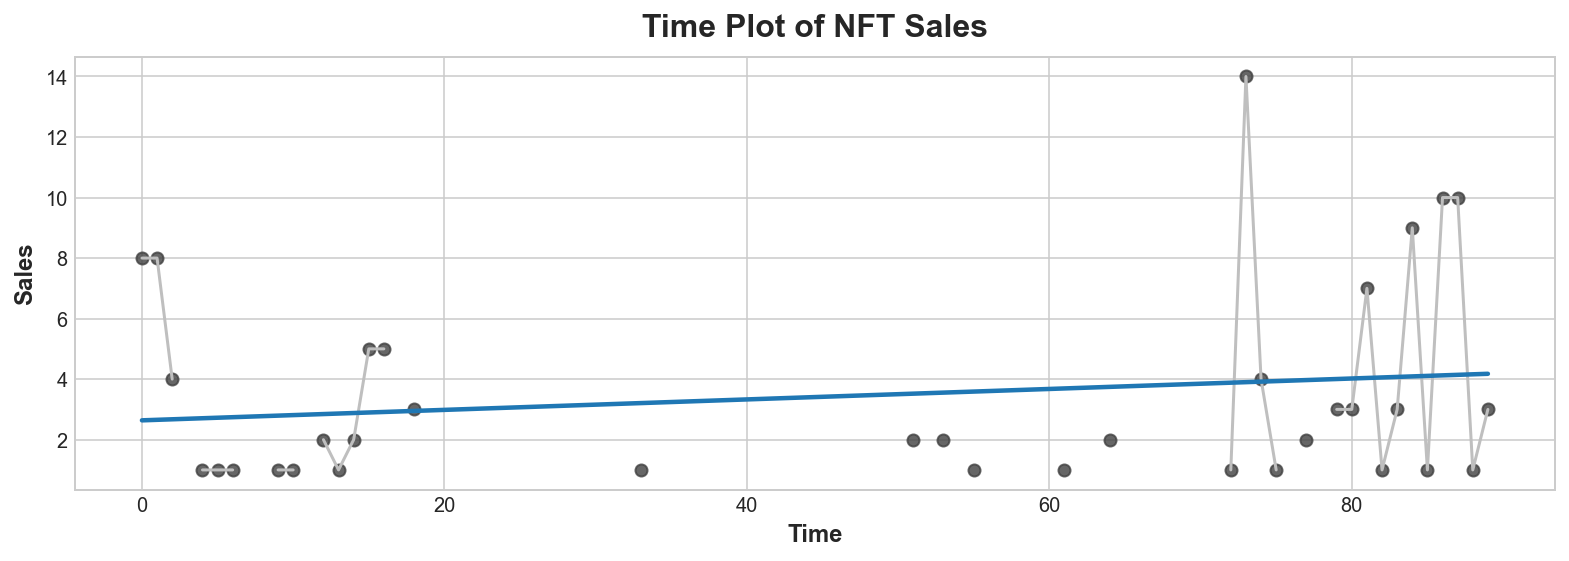

In [27]:
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('Time', 'Sales', data=sales_data, color='0.75')
ax = sns.regplot(x='Time', y='Sales', data=sales_data, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of NFT Sales');

In [32]:
# Preparing the floor price data
floor_price_data = data.loc[data.type.isin(['buyNow','list'])]
floor_price_data = pd.DataFrame(floor_price_data.groupby('date').price.min())
floor_price_data.rename(columns = {'price':'floor price'}, inplace = True)
# floor_price_data

In [34]:
# Preparing the daily avg sale data

avg_price_data = data.loc[data.type == 'buyNow']
avg_price_data = pd.DataFrame(avg_price_data.groupby('date').price.mean())
avg_price_data.rename(columns = {'price':'avg price'}, inplace = True)
# avg_price_data

# Time series

## Linear Regression

ModuleNotFoundError: No module named 'cloudscraper'